## Delivery_time -> Predict delivery time using sorting time 

### Bussines Problem - To Predict delivery time using sorting time 

#### 1. Importing the required libraries

In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

#### 2. Importing the required Files

In [3]:
d_time = pd.read_csv('delivery_time.csv')
d_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


#### 3. Data Understanding

In [4]:
d_time.shape

(21, 2)

In [5]:
d_time.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
d_time.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [7]:
d_time.describe(include='all')

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


##### 3 (a). Renaming columns

In [8]:
d_time = d_time.rename(columns={'Delivery Time':'delivery_data','Sorting Time':'sorting_data'})
d_time

,delivery_data,sorting_data
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_data  21 non-null     float64
 1   sorting_data   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='delivery_data', ylabel='Density'>

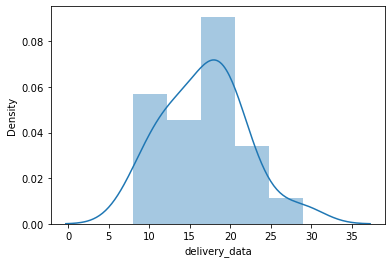

In [9]:
d_time.info()
sns.distplot(d_time['delivery_data'])

<AxesSubplot:xlabel='sorting_data', ylabel='Density'>

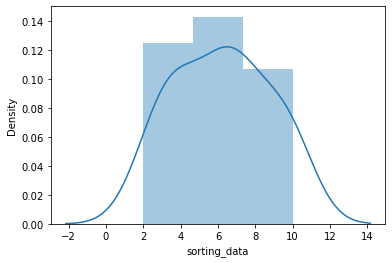

In [10]:
sns.distplot(d_time['sorting_data'])

#### 3 (b). Check Assumptions if they are matching 

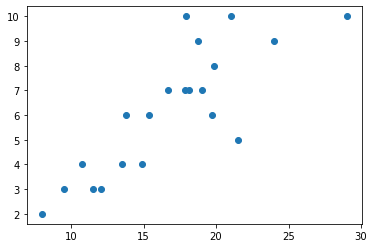

In [11]:
plt.scatter(x = 'delivery_data',y = 'sorting_data',data = d_time)

In [12]:
#correlation_analysis
d_time.corr()

,delivery_data,sorting_data
delivery_data,1.000000,0.825997
sorting_data,0.825997,1.000000


<AxesSubplot:xlabel='sorting_data', ylabel='delivery_data'>

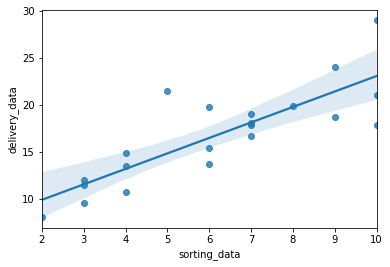

In [13]:
sns.regplot(x = 'sorting_data',y = 'delivery_data',data = d_time)

##### 3 (c). Applying Logarithmic Transformation

In [14]:
d_time['delivery_data'] = np.log(d_time['delivery_data'])
d_time['sorting_data'] = np.log(d_time['sorting_data'])

In [15]:
d_time

,delivery_data,sorting_data
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


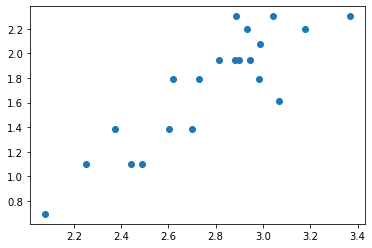

In [16]:
plt.scatter(x = 'delivery_data',y = 'sorting_data',data = d_time)

<AxesSubplot:xlabel='sorting_data', ylabel='delivery_data'>

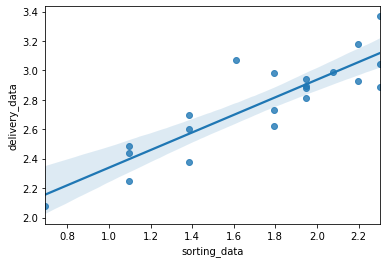

In [17]:
sns.regplot(x = 'sorting_data',y = 'delivery_data',data = d_time)

#### 4. Model Building || 6. Model Training

There are basically 2 libraries that support Leniar Regression algorithm

1. Statsmodels libraries
2. sklearn libraries

In [18]:
linear_model = smf.ols(formula = 'delivery_data~sorting_data',data = d_time).fit()
linear_model

#### 7. Model Testing

In [19]:
# finding Coefficient parameters
linear_model.params

Intercept       1.741987
sorting_data    0.597522
dtype: float64

In [20]:
# Finding tvalues and pvalues
linear_model.tvalues, linear_model.pvalues

(Intercept       13.085552
 sorting_data     8.024484
 dtype: float64,
 Intercept       5.921137e-11
 sorting_data    1.601539e-07
 dtype: float64)

In [21]:
# Finding Rsquared Values
linear_model.rsquared, linear_model.rsquared_adj

(0.77216134926874, 0.7601698413355158)

#### 8. Model prediction

* Manual prediction for sorting time say 5

In [23]:
d_time = (6.582734) + (1.649020) * 5
d_time

14.827834

#### 9. Automatic prediction for say sorting time 5, 8

In [24]:
new_data = pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [25]:
data_pred = pd.DataFrame(new_data,columns = ['sorting_data'])
data_pred

,sorting_data
0,5
1,8


In [26]:
linear_model.predict(data_pred)

0    4.729599
1    6.522166
dtype: float64

### Prediction of delivery time using sorting time is done